In [7]:
# Hector Estelles Estrella, 2019
import numpy as np
import matplotlib.pyplot as plt

import lal
import lalsimulation as lalsim

# Calling waveforms in time domain 

In [2]:
# First, choose some parameters for your waveform

m1 = 25. # mass of BH 1
m2 = 15. # mass of BH 2
s1 = [0.,0.,0.5] # dimless spin of BH 1
s2 = [0.,0.,-0.5] # dimless spin of BH 2
distInMpc = 200 # distance in megaparsecs
incl = 0. # angle between line-of-sight and J direction
beta = 0. # azimuthal angle at reference frequency
dt = 1./4096 # time resolution
fmin = 20. # minimun frequency
fref = 20. # reference frequency at which spins are specified
model = lalsim.IMRPhenomPv2 # approximant you want to use

In [3]:
# Let's call it in time domain

hp, hc = lalsim.SimInspiralChooseTDWaveform(m1=lal.MSUN_SI*m1, #need to multiply by SI units
                                            m2=lal.MSUN_SI*m2,
                                            s1x=s1[0], s1y=s1[1], s1z=s1[2],
                                            s2x=s2[0], s2y=s2[1], s2z=s2[2],
                                            distance=1000000*lal.PC_SI*distInMpc, 
                                            inclination=incl, 
                                            params=lal.CreateDict(),
                                            phiRef=beta, 
                                            f_ref=fref,
                                            deltaT=dt,
                                            f_min=fmin,
                                            longAscNodes=0.0,
                                            eccentricity=0.0,
                                            meanPerAno=0.0,
                                            approximant=model)
# Create the times array

times = np.arange( hp.data.length ) * hp.deltaT

# Let's align the waveform at peak amplitude

ampTS = np.abs(hp.data.data - 1j*hc.data.data)

timeofmax = times[np.argmax(ampTS)]

times = times - timeofmax

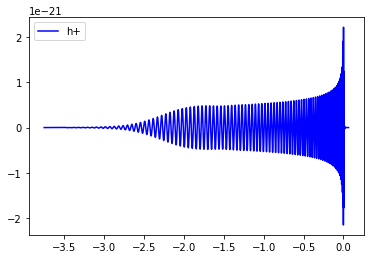

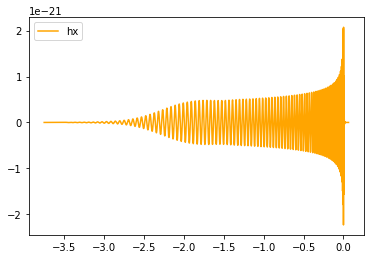

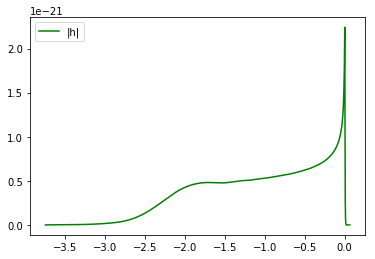

In [4]:
# Let's plot the polarisations

plt.plot(times,hp.data.data,color='blue',label='h+')
plt.legend()
plt.show()

plt.plot(times,hc.data.data,color='orange',label='hx')
plt.legend()
plt.show()

plt.plot(times,ampTS,color='green',label='|h|')
plt.legend()
plt.show()

## Calling waveforms in frequency domain 

In [5]:
# Let's call it in time domain

hp, hc = lalsim.SimInspiralChooseFDWaveform(m1=lal.MSUN_SI*m1,
                                            m2=lal.MSUN_SI*m2, 
                                            S1x=s1[0], S1y=s1[1], S1z=s1[2],
                                            S2x=s2[0], S2y=s2[1], S2z=s2[2],
                                            distance=1000000*lal.PC_SI*distInMpc, 
                                            inclination=incl, 
                                            LALpars=lal.CreateDict(),
                                            phiRef=beta, 
                                            f_ref=fref,
                                            deltaF=0.1,
                                            f_min=fmin,
                                            f_max = 2000,
                                            longAscNodes=0.0,
                                            eccentricity=0.0,
                                            meanPerAno=0.0,
                                            approximant=model)
# Create the times array

freqs = np.arange( hp.data.length ) * hp.deltaF

hFS = hp.data.data + 1j*hc.data.data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


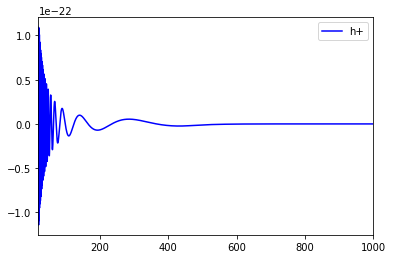

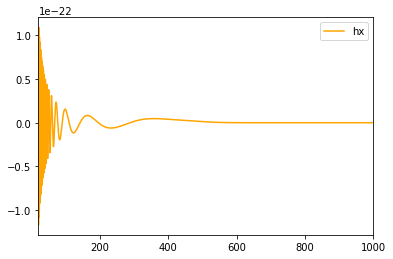

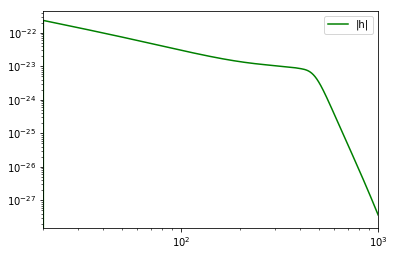

In [6]:
# Let's plot the polarisations

plt.plot(freqs,hp.data.data,color='blue',label='h+')
plt.legend()
plt.xlim(20,1000)
plt.show()

plt.plot(freqs,hc.data.data,color='orange',label='hx')
plt.legend()
plt.xlim(20,1000)
plt.show()

plt.plot(freqs,np.abs(hFS),color='green',label='|h|')
plt.legend()
plt.xlim(20,1000)
plt.xscale('log')
plt.yscale('log')
plt.show()